In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('./data/train.csv', index_col='id', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', index_col='id', encoding="ISO-8859-1")

products_description = pd.read_csv('./data/product_descriptions.csv')
products_attributes = pd.read_csv('./data/attributes.csv')

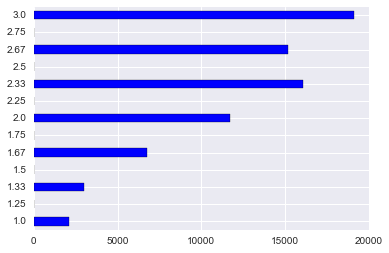

In [3]:
# class distribution
train.relevance.value_counts().sort_index().plot(kind='barh');

In [4]:
products_attributes.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [5]:
train.head()

,product_uid,product_title,search_term,relevance
id,,,,
2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [6]:
products_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [7]:
train[train.product_uid == 100006]

,product_uid,product_title,search_term,relevance
id,,,,
18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00
20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67
21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00


In [8]:
print str(train[train.product_uid == 100006].product_title.ix[18])

Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking


In [9]:
print str(products_description[products_description.product_uid == 100006].product_description.ix[5])

Achieving delicious results is almost effortless with this Whirlpool over-the-range microwave hood with convection cooking. With 1.9 cu. ft. capacity, you'll have room to prepare multiple dishes at once. And, you won't have to micro-manage the cooking process thanks to the sensor cooking options. Sensor cooking tracks cooking progress and automatically adjusts cooking time. Convection roasting and baking allows you to bake cakes, bread, cookies and roast meats with ease. Clean-up is simple too with the industry leading CleanRelease non-stick interior surface. It easily releases cooked-on food without the use of harsh chemicals. A damp cloth or sponge is all that is needed to remove cooked-on spills and splashes.California residents: see&nbsp;Proposition 65 informationSpacious 1.9 cu. ft. capacity accommodates dinner plates and casserole dishes with ease1100 watts of cooking power and 10 cooking levels make cooking and reheating a snap400 CFM venting system whisks smoke, steam and odors

In [10]:
products_attributes[products_attributes.product_uid == 100006]

,product_uid,name,value
132,100006,Appliance Type,Over the Range Microwave
133,100006,Assembled Depth (in.),18.5 in
134,100006,Assembled Height (in.),17.13 in
135,100006,Assembled Width (in.),29.94 in
136,100006,Bullet01,Spacious 1.9 cu. ft. capacity accommodates din...
137,100006,Bullet02,1100 watts of cooking power and 10 cooking lev...
138,100006,Bullet03,"400 CFM venting system whisks smoke, steam and..."
139,100006,Bullet04,Single piece door with built-in touch-activate...
140,100006,Bullet05,Cook with confidence with the Sensor and Progr...
141,100006,Bullet06,"Kids' Menu: it's simple, it's fast. The Kids' ..."


In [11]:
# merge datasets
train_merged = pd.merge(train, products_description, how='left', on='product_uid')
test_merged = pd.merge(test, products_description, how='left', on='product_uid')

In [21]:
# count how many times a search term is present in product description

def get_num_times_match(search_terms, description):
    return sum(int(description.find(word)>=0) for word in search_terms.split())

train_merged['count_search_terms'] = train_merged.apply(lambda x: get_num_times_match(x['search_term'], x['product_description']), axis=1)
train_merged['count_search_terms_by_length'] = train_merged.apply(lambda x: x['count_search_terms'] * 1. / len(x['search_term'].split()), axis=1)
train_merged['query_count'] = train_merged.search_term.map(lambda x: len(x.split()))

In [20]:
train_merged[['count_search_terms', 'count_search_terms_by_length', 'relevance']]

,count_search_terms,count_search_terms_by_length,relevance
0,1,0.500000,3.00
1,1,0.500000,2.50
2,2,1.000000,3.00
3,0,0.000000,2.33
4,1,0.333333,2.67
5,1,0.500000,3.00
6,2,0.666667,2.67
7,0,0.000000,3.00
8,1,0.500000,2.67
9,1,0.500000,3.00


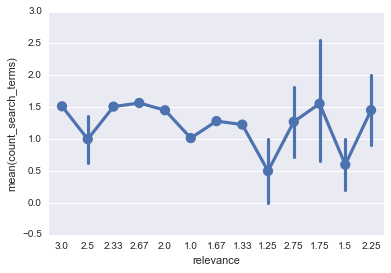

In [15]:
sns.pointplot(x='relevance', y='count_search_terms', data=train_merged);

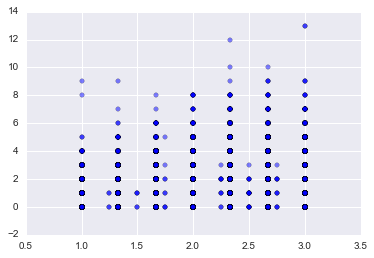

In [17]:
plt.scatter(train_merged.relevance, train_merged.count_search_terms, alpha=.5);

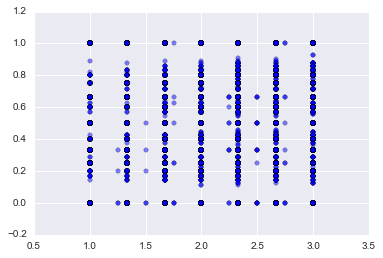

In [18]:
plt.scatter(train_merged.relevance, train_merged.count_search_terms_by_length, alpha=.5);

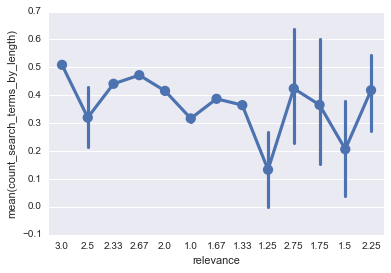

In [19]:
sns.pointplot(x='relevance', y='count_search_terms_by_length', data=train_merged);

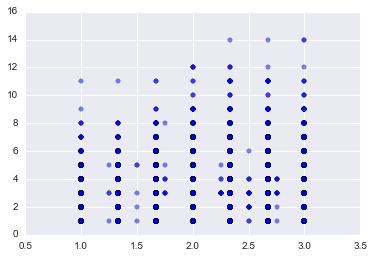

In [22]:
plt.scatter(train_merged.relevance, train_merged.query_count, alpha=.5);

In [23]:
train_merged.query_count.describe()

count    74067.000000
mean         3.159207
std          1.262096
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: query_count, dtype: float64

In [25]:
train_merged[train_merged.query_count == 14].search_term.ix[18986]

u'1/2 in. fip x 7/16 in. or 1/2 in. slip joint angle stop valv'